In [1]:
import pandas as pd
import numpy as np
import datetime
from sim import generate_simulation

pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

In [2]:
h1_capacity = 187
h2_capacity = 226
aod = "2017-08-01"
aod_dt = pd.to_datetime(aod)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
# h1_sim = pd.read_pickle("pickle/h1_sim.pick")
# h2_sim = pd.read_pickle("pickle/h2_sim.pick")

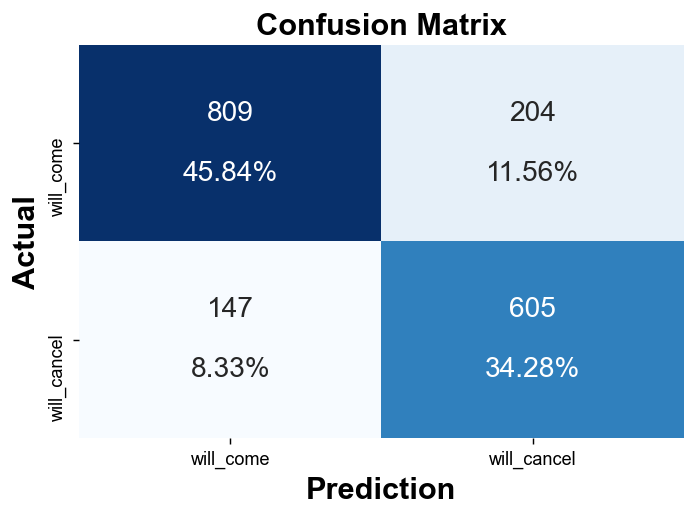

Optimal probability threshold (to maximize F-0.5): 0.558
F-0.5 Score: 0.759



NameError: name 'h1_res' is not defined

In [3]:
h1_sim = generate_simulation(h1_dbd, aod, 1, h1_res)

In [ ]:
h2_sim = generate_simulation(h2_dbd, aod, 2, h2_res)

In [ ]:
h1_sim.head(15)

In [ ]:
h2_sim.head()

In [ ]:
h1_sim.loc["2017-08-15", ["RoomsOTB", "STLY_OTB", "LYA_RoomsSold"]]

In [ ]:
h1_dbd.loc["2016-08-16", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]

In [ ]:
h1_res['ReservationStatusDate'] = pd.to_datetime(h1_res.ReservationStatusDate)
mask = ((h1_res.ArrivalDate <= '2017-08-15') & (h1_res.ResMadeDate <= '2017-08-15') & (h1_res.CheckoutDate > '2017-08-15')) & ((h1_res.IsCanceled == 0) | ((h1_res.ReservationStatusDate <= '2017-08-15') & (h1_res.IsCanceled==1)))
h1_res_aod = h1_res[mask][['IsCanceled', 'ArrivalDate', 'CheckoutDate', 'ResMadeDate', 'LOS', 'ReservationStatusDate']]
h1_res_aod.sort_values('ReservationStatusDate', ascending=False, inplace=True)
h1_res_aod.head(3)


In [ ]:
h1_res_aod[h1_res_aod.IsCanceled==0]